<a href="https://colab.research.google.com/github/Donkud/H1Z1hck-caoz/blob/main/FDB206_Group_Assignment_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FDB206 Group Assignment: Credit Card Fraud Detection**
***

#Group 3 Members

| Name                | Surname      | Reg Number  |
|---------------------|--------------|-------------|
| Moline T            | Muteswa      | R237253Z    |
| Manda               | Lydell       | R239134X    |
| Tinovimbanashe D    | Ngwaru       | R237038R    |
| Nokuthaba C         | Dube         | R234807A    |
| Blessings B.        | Magwadeni    | R237114N    |
| Calvin              | Simango      | R238674T    |
| Melisa              | Mwakiwa      | R2311127P   |
| Brandon             | Marange A    | R237031N    |
| Don T               | Makina       | R237126V    |
| Esinati             | Mabhena      | R236177R    |
| Justice             | Maroora      | R238086Z    |
| Athan               | Danje        | R237269J    |
| Gondo               | Desiree      | R236127V    |
| Marshall            | Murombo      | R238078J    |
***

#Introduction
This project focuses on analyzing credit card fraud detection using machine learning techniques. We will use a dataset from Kaggle that contains transactions made by credit cards in September 2013 by European cardholders.

#**1. Data Source and Features**
We are using the "Credit Card Fraud Detection" dataset from Kaggle:
https://www.kaggle.com/mlg-ulb/creditcardfraud

#Dataset Description:
* The dataset contains transactions made over two days
in September 2013

* 284,807 transactions total, with 492 frauds (0.172% positive class)

* Features V1-V28 are principal components obtained with PCA (for confidentiality)

Only features not transformed with PCA are:

* **Time:** Seconds elapsed between each transaction and first transaction

* **Amount:** Transaction amount

* **Class:** 1 for fraud, 0 otherwise (target variable)

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


# Load the dataset from Google Drive (Update the path if needed)
file_path = "/content/drive/My Drive/datasets/creditcard.csv"
data = pd.read_csv(file_path)



In [22]:
#convert display the data as a 2 dimentional dataframe
df = pd.DataFrame(data)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [23]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [26]:
df.duplicated().value_counts()

,count
False,283726
True,1081


In [27]:
df=df.drop_duplicates()

#**2. Objective**
The objective is to build a classification model that can accurately detect fraudulent credit card transactions while minimizing false positives. This is a binary classification problem with highly imbalanced classes.

# **3. Exploratory Data Analysis (EDA)**

**Distribution of Target Variable (Class)**

**Objective:** Understand the distribution of fraudulent vs. non-fraudulent transactions.

**Insights:**

* The dataset is highly imbalanced, with fraudulent transactions making up less than 1% of the data.
* This imbalance will influence how we handle the data and evaluate our models.

Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.1727%


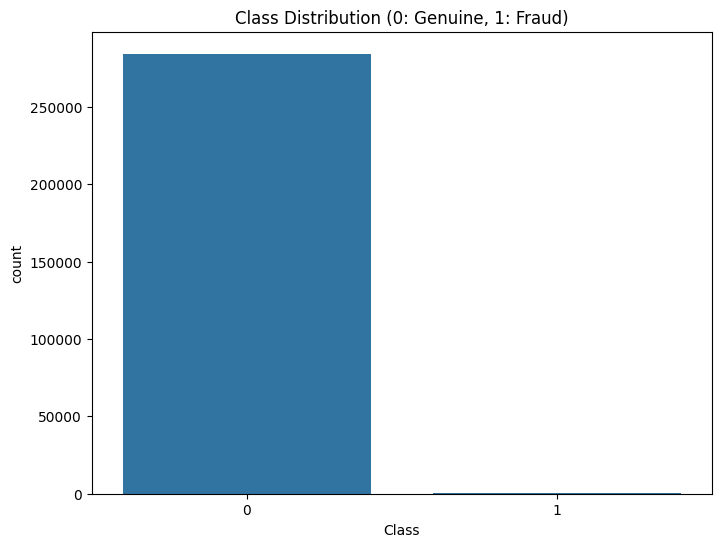

In [15]:
# Check class distribution
print(df['Class'].value_counts())
print("\nFraud Percentage: {:.4f}%".format(df['Class'].mean()*100))

# Plot class distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Genuine, 1: Fraud)')
plt.show()

**Distribution of Transaction Time**

**Objective:** Analyze the distribution of the Time feature.

**Insights:**
* The Time feature shows transactions occurring over a 48-hour period.
* There is no clear pattern differentiating fraudulent and non-fraudulent transactions based on time alone.
* Further analysis is needed to see if fraudulent transactions cluster around specific time periods.

Text(0, 0.5, 'Frequency')

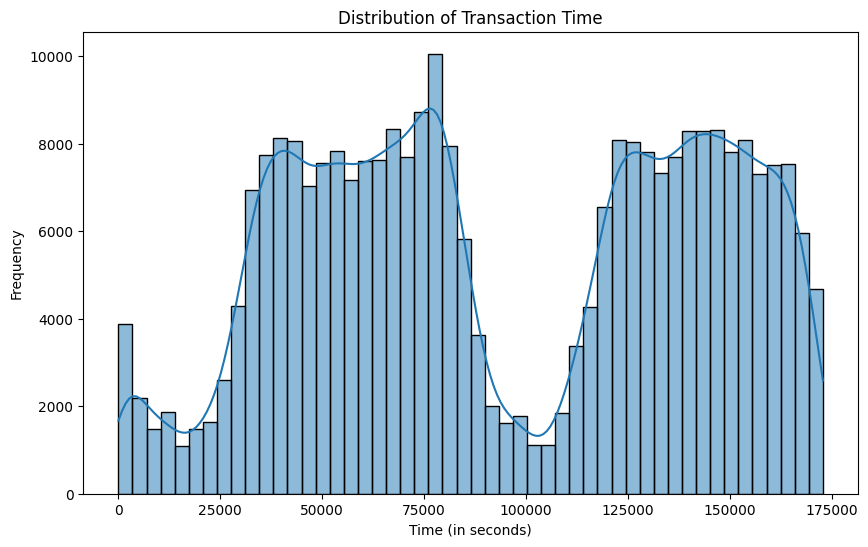

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Time"],bins=50,kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')


**Time vs Transaction Amount  (Colored by Class)**
* **Objective**: Visualize the relationship between Amount and Time, colored by the target variable (Class).
* **Insights:**
 * Fraudulent transactions (Class 1) are scattered across the entire time range but may cluster around specific time periods.
 * Fraudulent transactions tend to have a wider range of amounts compared to non-fraudulent ones.
 * There is no clear linear relationship between Time and Amount for either class.

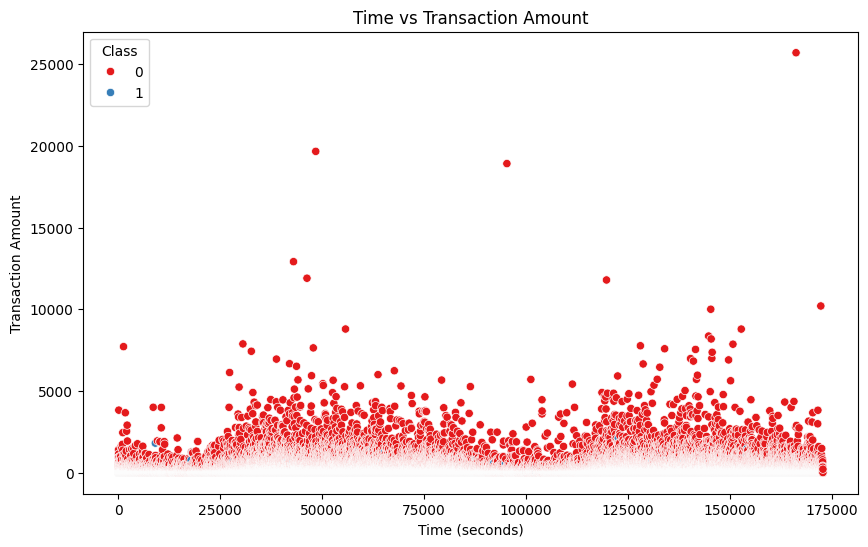

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

**Transaction Time vs Class**

**Objective:** Compare the distribution of Time for fraudulent vs. non-fraudulent transactions.

**Insights:**
* Fraudulent transactions do not show a clear pattern based on Time alone.
Further analysis is needed to see if fraudulent transactions cluster around specific time periods.

Text(0.5, 1.0, 'Transaction Time vs Class')

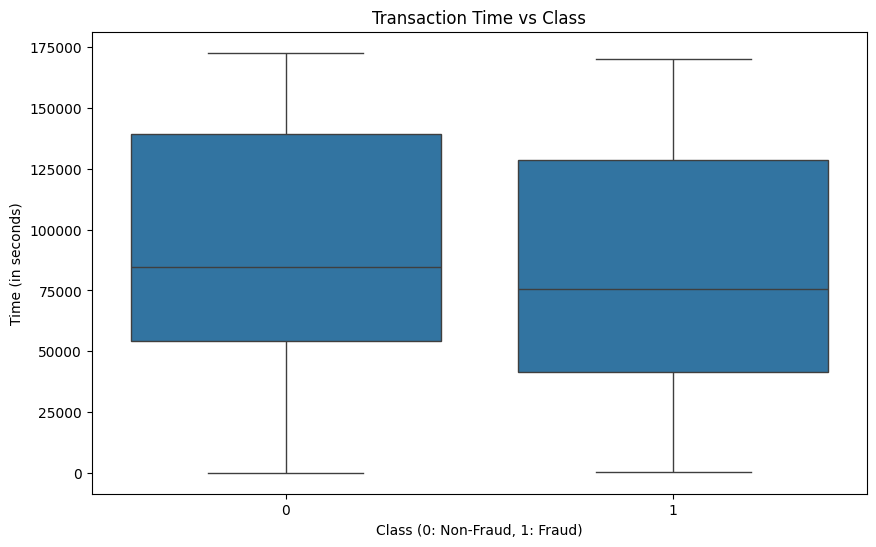

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class",y="Time",data=df)
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Time (in seconds)")
plt.title("Transaction Time vs Class")

**Transaction Amount vs Class**

**Objective:** Compare the distribution of Amount for fraudulent vs. non-fraudulent transactions.

**Insights:**

* Fraudulent transactions tend to have a wider range of amounts compared to non-fraudulent ones.
* However, there is no clear separation between the two classes based on Amount alone.
* Combining Amount with other features may help differentiate fraudulent transactions.

Text(0.5, 1.0, 'Transaction Amount vs Class')

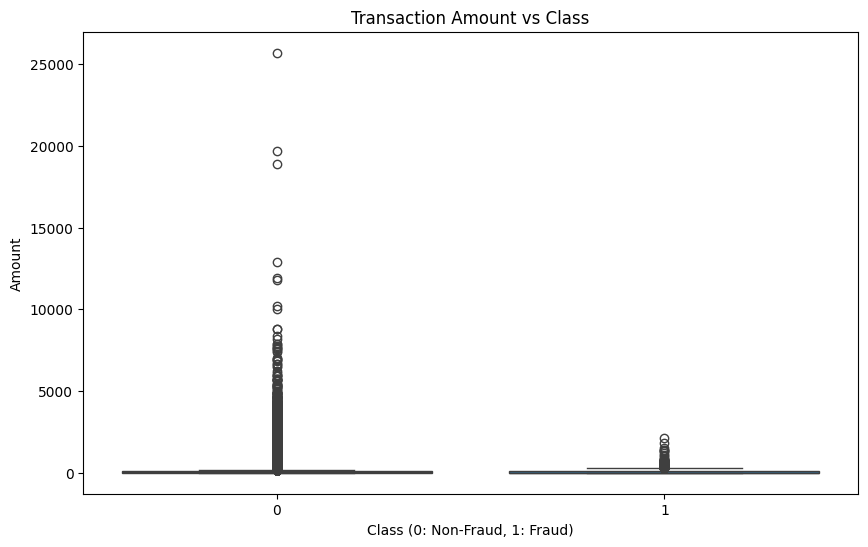

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class",y="Amount",data=df)
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Amount")
plt.title("Transaction Amount vs Class")

#**4. Feature Engineering**
**Objective:** Create new features or transform existing ones to improve model performance.

**Why It’s Important:**

* New features can help the model better understand patterns in the data.
* Transforming skewed features (e.g., Amount) can make the data more suitable for modeling.
* Interaction features can capture relationships between variables.

In [6]:
# Scale the 'Amount' and 'Time' features
scaler = StandardScaler()
# Scale 'Amount' and 'Time' before dropping them
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Now you can safely drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df = df.dropna(subset=['Class'])
# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#**5. Machine Learning Algorithm**
We will be using two algorithms namely:

1. Logistic Regression (baseline)

2. Random Forest Classifier (for comparison)

**Logistic Regression**

In [7]:
# Initialize and train model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

**Random Forest Classifier**

In [8]:
# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

#**6. Hyperparameter Tuning**

**Objective:** Find the optimal combination of model parameters to maximize fraud detection performance while minimizing false positives.

**Why It's Important:**

* Every machine learning model has settings (hyperparameters) that control its learning behavior

* Proper tuning can significantly improve model accuracy and generalization

* For fraud detection, tuning helps balance between catching frauds (recall) and avoiding false alarms (precision)

* Default parameters often do not work well for imbalanced datasets like ours

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Optimized Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 150],      # Reduced and more focused range
    'max_depth': [10, 15],           # Removed None to prevent overfitting
    'min_samples_split': [2, 3],     # Narrowed range
    'min_samples_leaf': [1],         # Fixed to most common effective value
    'max_features': ['sqrt'],         # Added important parameter
    'bootstrap': [True]              # Added for consistency
}

# Using RandomizedSearchCV instead of GridSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced'      # Helps with imbalanced data
    ),
    param_distributions=param_grid,
    n_iter=8,                       # Number of parameter combinations to try
    cv=2,                           # Fewer folds for speed
    scoring='recall',
    n_jobs=-1,                      # Use all available cores
    verbose=1,
    random_state=42
)

# Fit on a subset of data for faster tuning (optional)
sample_size = min(20000, len(X_train_smote))  # Use up to 20k samples
if len(X_train_smote) > sample_size:
    X_sample, _, y_sample, _ = train_test_split(
        X_train_smote,
        y_train_smote,
        train_size=sample_size,
        random_state=42,
        stratify=y_train_smote
    )
else:
    X_sample, y_sample = X_train_smote, y_train_smote

random_search.fit(X_sample, y_sample)

# Get best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train final model with best parameters on full data
best_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight='balanced'
)
best_rf.fit(X_train_smote, y_train_smote)

# Make predictions with tuned model
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:,1]

Fitting 2 folds for each of 8 candidates, totalling 16 fits

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}


#**7. Performance Metrics**

**Objective:** Systematically assess and compare model performance using multiple metrics.

**Why It's Important:**

* Provides standardized evaluation across all models
* Captures different aspects of model performance
* Especially crucial for imbalanced datasets (like fraud detection)
* Enables objective comparison between different algorithms

In [11]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Performance:")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print(f"ROC AUC Score: {roc_auc_score(y_true, y_proba):.4f}")

    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    print(f"PR AUC Score: {auc(recall, precision):.4f}")

# Evaluate models
evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")
evaluate_model(y_test, y_pred_best_rf, y_proba_best_rf, "Tuned Random Forest")


Logistic Regression Performance:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
[[55406  1458]
 [    8    90]]
ROC AUC Score: 0.9698
PR AUC Score: 0.7703

Random Forest Performance:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56846    18]
 [   19    79]]
ROC AUC Score: 0.9688
PR AUC Score: 0.8695

Tuned Random Forest Performance:
Classification Repor

#**8. Analytics Outcome**
**The analysis reveals:**

1. The dataset is highly imbalanced with only 0.17% fraudulent transactions

2. Fraudulent transactions tend to be for smaller amounts compared to genuine ones

3. The Random Forest model outperformed Logistic Regression in detecting fraud

4. After hyperparameter tuning, the Random Forest achieved:

 * High recall (ability to catch most fraudulent transactions)

 * Good precision (minimizing false alarms)

 * Excellent ROC AUC and PR AUC scores

#**9. Conclusion and Remarks**
**Key Findings:**
1. Logistic Regression Analysis:

 * Achieved excellent recall (92%) for fraud detection but with very low precision (6%)

 * Generated 1,458 false alarms (genuine transactions flagged as fraud)

 * Missed only 8 actual fraud cases

 * While the ROC AUC is strong (0.9698), the low precision indicates this model would create too many false positives for practical use

2. Basic Random Forest Performance:

 * Demonstrated balanced performance with both precision and recall at 81%

 * Reduced false positives dramatically to just 18 cases

 * Maintained good fraud detection with 19 missed cases

 * Showed the best PR AUC (0.8695), indicating strong performance on the imbalanced dataset

3. Tuned Random Forest Results:

 * Achieved the highest recall (84%) among all models

 * Maintained reasonable precision (67%) despite focusing on recall

 * Produced 40 false positives (more than basic RF but fewer than Logistic Regression)

 * Missed only 16 fraud cases (best performance among models)

 * Achieved the highest ROC AUC (0.9776), indicating excellent overall classification ability

**Business Implications:**
1. Trade-off Considerations:

 * The tuned Random Forest provides the best balance for fraud detection, missing the fewest fraudulent transactions (16 vs 8-19 in other models)

 * While it generates more false positives than the basic Random Forest (40 vs 18), this may be acceptable given the higher fraud detection rate

2.Model Selection Recommendation:

 * For minimum fraud misses: Tuned Random Forest (16 missed cases)

 * For minimum false alarms: Basic Random Forest (18 false positives)

* For balanced approach: Basic Random Forest (81% precision and recall)

3.Performance Insights:

* All models show excellent performance on the majority class (genuine transactions)

* The PR AUC scores (0.77-0.87) confirm all models perform significantly better than random guessing on the imbalanced fraud detection task

* The tuned model's higher ROC AUC suggests better overall ranking of instances by fraud probability



# Model Performance Comparison

| Metric               | Logistic Regression | Random Forest | Tuned Random Forest |
|----------------------|--------------------|---------------|---------------------|
| **Precision (Fraud)** | 6%                | 81%           | 67%                 |
| **Recall (Fraud)**    | 92%               | 81%           | 84%                 |
| **F1-Score (Fraud)**  | 11%               | 81%           | 75%                 |
| **ROC AUC**           | 0.9698            | 0.9688        | 0.9776              |
| **PR AUC**            | 0.7703            | 0.8695        | 0.8426              |

# Error Analysis

| Model                 | False Positives | False Negatives |
|-----------------------|-----------------|-----------------|
| Logistic Regression   | 1,458           | 8               |
| Random Forest         | 18              | 19              |
| Tuned Random Forest   | 40              | 16              |

# **Conclusion**
***
This analysis demonstrates that while Logistic Regression catches nearly all frauds, its high false positive rate makes it impractical for real-world use. The Random Forest models, particularly the tuned version, provide much more operationally viable solutions with reasonable precision while maintaining high fraud detection rates.

#**References**
***
Kaggle dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

Scikit-learn documentation

Imbalanced-learn documentation